## User can check the percentage of availability of the airbnb based on the statistics throught the year.

How to use:
Enter desired listing_id

What it does:
Calculate the percentage of availability of that listing.

In [39]:
# Basic Libraries
import numpy as np
import pandas as pd
import calmap # plot the calendar

import matplotlib.pyplot as plt, mpld3

## Currently it is using the original calendar.csv file. Code will work even with change to reference file.
Because it will search for the column 'listing_id' to group them into df

In [2]:
#import csv into dataframe
calendarDF = pd.read_csv('calendar.csv')

In [3]:
g = calendarDF.groupby('listing_id') #group by listing_id, now data frame is grouped into different group corresponding to listing_id

In [4]:
#User key in the listing id to check their percentage of availability.
print('Key in your desired listing id')
listing_id_input =  int(input()) #input data type is a string

Key in your desired listing id
953595


In [5]:
#g is a data frame grouped by listing id.
listing_id_input = int(listing_id_input) #convert input into interger

#default conditions before checking through dataframes and ids.
listing_inputExists = False #check if user input of listing id exists in listing id.

for listing_id, listing_id_df in g: #for each listing id in g, each dataframe inside the listing id,
    if (listing_id == listing_id_input): #check through all listing id for input
        listing_inputExists = True
        print('Found!')
        df = listing_id_df #store the found dataframe into df

if (listing_inputExists == False):
    print('Not Found.')

Found!


In [6]:
#available Length: 365

ser = pd.Series(df['available']) #store the series (one-dimensional labeled array) of 'available' inside the listing_id_df. 
data = ser.ne('f') #ne returns True for every element which is Not Equal to the element in passed series.

#if unavailable = false, if available = true

In [7]:
#calculate number of available days

# (index number) , (number of available slots)

num = 0 #store number of available 

for a in data: #for each element in data
    if (a == True): #if data is true, print data
        num = num +1

In [8]:
pct = (100*num)/365 #calculate percentage of availability

pct = '{0:.2f}%'.format(pct) #convert into 2dp and put % behind the number

print('Percentage of availability of listing_id '+str(listing_id_input)+': '+str(pct)) #str(z) to convert z into a string.

Percentage of availability of listing_id 953595: 79.73%


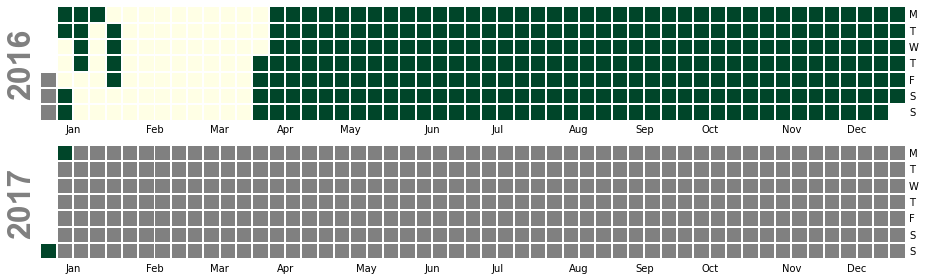

In [67]:


df['available_num'] =[3 if x =='t' else -1 for x in df['available']] # instead of t and f, it will be 3 and -1

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d %H:%M:%S') # convert date format with h:m:s

events=pd.Series(df['available_num']) # convert the dataset into series

events.index= pd.DatetimeIndex(df['date']) # set date as the index 

calmap.calendarplot(events, monthticks=1, daylabels='MTWTFSS',cmap='YlGn', fillcolor='grey', linewidth=1, fig_kws=dict(figsize=(16, 4)))

plt.savefig("1234.jpg")




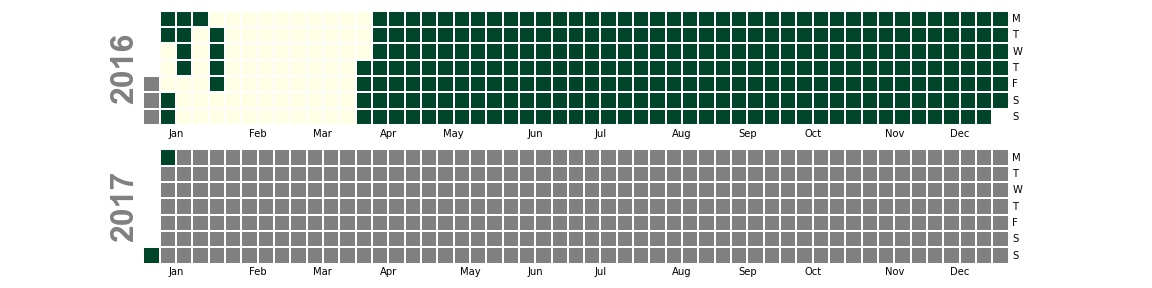

In [70]:
import base64
data_uri = base64.b64encode(open('1234.jpg', 'rb').read()).decode('utf-8')
img_tag = '<img src="data:image/png;base64,{0}">'.format(data_uri)
print(img_tag)

# End